In [1]:
from sklearn.datasets import fetch_openml # load MNIST data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math # for exp in sigmoid

# 1. Load MNIST Dataset
<img src='media/MNIST_examples.png' alt='MNIST examples'>

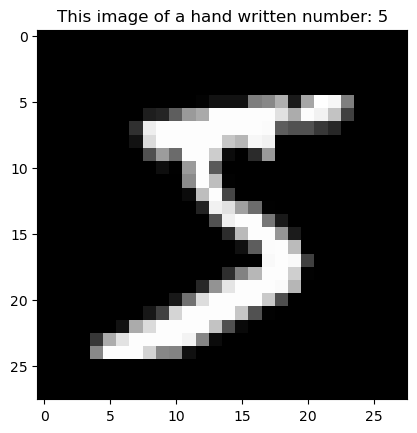

In [62]:
# load data from sklearn
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target'] # two dataframes
y_one_hot_array = pd.get_dummies(y, prefix='class').to_numpy().astype(int)
# plot first example
image = X.iloc[0].values.reshape(28, 28)
label = y.iloc[0]
plt.title(f'This image of a hand written number: {label}')
plt.imshow(image, cmap='gray')

# 2. Activation Functions

In [19]:
def ReLU(x):
    # rectified linear unit
    return np.maximum(0, x)

def SELU(x):
    # scaled exponential linear unit
    return np.where(x <= 0, 1.75809 * (np.exp(x)-1), 1.0507 * x)

def tanh(x):
    # hyperbolic tangent
    x = np.clip(x, -500, 500)  # prevent overflow
    exp_x = np.exp(x)
    exp_neg_x = np.exp(-x)
    return (exp_x - exp_neg_x) / (exp_x + exp_neg_x)


def softmax(x):
    denominator = np.sum(np.exp(x)) # sum of all the e^logit for every logit
    return np.exp(x) / denominator # normalize e^logit value by sum of e^logits


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# 3. Initialize Numpy Neural Network
<img src='media/nn_arcitecture.png' alt='Network Arcitecture'>

## Weight Initializations

In [4]:
def xavier_init(size):
    in_dim, out_dim = size
    limit = np.sqrt(6 / (in_dim + out_dim))
    return np.random.uniform(-limit, limit, size)


def he_init(size):
    in_dim, _ = size
    stddev = np.sqrt(2 / in_dim)
    return np.random.normal(0, stddev, size)

In [5]:
X.iloc[0].values.shape

(784,)

In [36]:
x = X.iloc[0].values / 255 # normalize it
input_size = X.iloc[0].values.shape[0]
output_size = len(y.values.unique())

#### Initialize weight matrixes

# first layer of model
l1_num_nodes = 1568
l1_weights = np.random.randn(input_size, l1_num_nodes)
l1_output = np.dot(x, l1_weights) # you would just add a bias term to this
print(f'shape of layer 1 rep: {l1_output.shape}')
# second layer of the model
l2_num_nodes = 2000
l2_weights = np.random.randn(l1_num_nodes, l2_num_nodes)
l2_output = np.dot(l1_output, l2_weights) # you would just add a bias term to this
print(f'shape of layer 2 rep: {l2_output.shape}')

# Third layer
l3_num_nodes = 784
l3_weights = np.random.randn(l2_num_nodes, l3_num_nodes)
l3_output = np.dot(l2_output, l3_weights) # you would just add a bias term to this
print(f'shape of layer 3 rep: {l3_output.shape}')

# Final output layer
l4_num_nodes = output_size
l4_weights = np.random.randn(l3_num_nodes, l4_num_nodes)
l4_output = np.dot(l3_output, l4_weights) # you would just add a bias term to this
print(f'output shape: {l4_output.shape}')

shape of layer 1 rep: (1568,)
shape of layer 2 rep: (2000,)
shape of layer 3 rep: (784,)
output shape: (10,)


In [37]:
from linearnn import linearnnclasses
linearlayer = linearnnclasses.LinearLayer(
    input_size=784, 
    output_size=1568, 
    activation=ReLU, 
    weight_init=he_init
)

print(linearlayer)
linearlayer.forward(x)

LinearLayer input:784, output:1568, activation:<function ReLU at 0x0000028B2BC551C0>


array([0.4289164, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ])

In [41]:
from linearnn import linearnnclasses
import importlib
importlib.reload(linearnnclasses)

sequential_model = linearnnclasses.SequentialModel(
    input_size=784,
    output_size=10,
    hidden_layers=(1568, 2000, 784), 
    activations=(ReLU, ReLU, SELU, tanh, softmax),
    weight_init=(he_init, he_init, he_init, xavier_init, he_init)
)
sequential_model.forward(x)

(784, 1568, 2000, 784, 10)
LinearLayer input:784, output:1568, activation:<function ReLU at 0x0000028B2BC551C0>
LinearLayer input:1568, output:2000, activation:<function SELU at 0x0000028B31ACD940>
LinearLayer input:2000, output:784, activation:<function tanh at 0x0000028B31ACC540>
LinearLayer input:784, output:10, activation:<function softmax at 0x0000028B31ACDA80>


array([0.06279801, 0.06060081, 0.03855207, 0.23979352, 0.11974261,
       0.18206953, 0.02868332, 0.02555174, 0.14718357, 0.09502482])

# 4. Model Training

## Loss

In [75]:
def categorical_cross_entropy(y:np.array, y_hat:np.array):
    y_hat = y_hat + 1e-07 # just incase there are zero values
    return -np.sum(y * np.log(y_hat))

In [79]:
y_hat = [0.01, 0.3, 0.00007, 0.66, 0.000001, 0.000001, 0.0002, 0.02, 0.1, 0.45]
y_hat = [0,0,0,0,0,.99,.01,0,0,0]
# y_hat = [0,0,0,0,0,0,0,0,0,1]

categorical_cross_entropy(y_one_hot_array[0, :], np.array(y_hat))

0.010050234843405595

In [63]:
y_one_hot_array[0, :]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])